In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [79]:
%%R
library(mlbench)
datasetxor <- mlbench.xor(100)
XR_datasetxor <- datasetxor$x
LABELSR_datasetxor<- datasetxor$classes

In [80]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()
x_df_xor = np.array(ro.r['XR_datasetxor'])
labels_df_xor = np.array(ro.r['LABELSR_datasetxor'])
labels_df_xor[labels_df_xor == 1] = -1
labels_df_xor[labels_df_xor == 2] = 1

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df_xor, labels_df_xor, random_state = 0, train_size = 0.7)

In [82]:
import grid_traintest_CV_HWRNA


In [139]:
pxor = 500
lam = 0

ret = grid_traintest_CV_HWRNA.train_ELM_DropOut2(xin = X_train, yin = y_train, p = pxor, control = True, lam = lam)

W = ret[0]
H = ret[1]
Z = ret[2]

[[-0.39138664  0.57536374 -0.          0.69312066 -0.14246522  0.69235248
   0.         -0.70458053 -0.00867094 -0.          0.41457771 -0.42181266
   0.6742589   0.6769752   0.         -0.16190719 -0.30765344  0.21881031
  -0.59941298  0.38726302 -0.344835   -0.28623877 -0.15218074  0.63173396
   0.01093958  0.24231659 -0.35547079  0.33592394  0.45659958 -0.
   0.          0.58077917  0.          0.21933795  0.16258844 -0.59873388
  -0.31619831  0.32247937  0.54787659  0.57064765 -0.         -0.
  -0.66515576 -0.08461816  0.38417328  0.65715318  0.22538053  0.
   0.15648984  0.5802758 ]
 [-0.65745983  0.56944338  0.         -0.41190881  0.50574157 -0.60996461
   0.33024931  0.43941106  0.34509869 -0.         -0.16289885  0.39345434
  -0.         -0.61570023 -0.69896886  0.         -0.13745063 -0.
   0.63329401  0.         -0.         -0.52733691  0.          0.65153987
   0.         -0.         -0.47612514  0.15888876  0.          0.00843383
  -0.         -0.12633393  0.11868871 -0.50

In [141]:
labels_df_reshaped = labels_df_xor.reshape(-1, 1)
mat_plot = np.concatenate((x_df_xor, labels_df_reshaped), axis = 1)
index_sort = 2
sorted_indices = np.argsort(mat_plot[:, index_sort])
mat_plot = mat_plot[sorted_indices]

[]

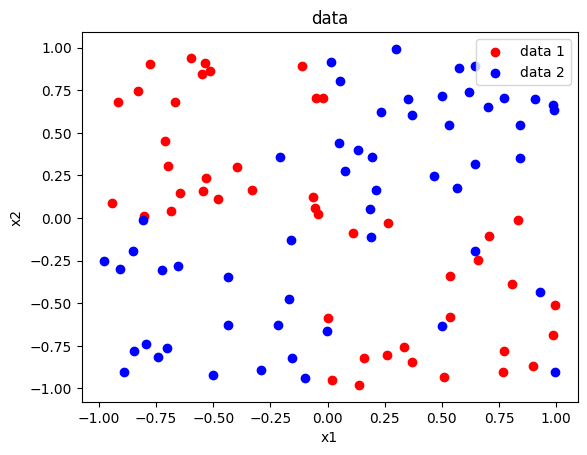

In [143]:
x1_points = mat_plot[: 46, 0 : 2]
x2_points = mat_plot[46 :, 0 : 2]
plt.scatter(x1_points[:, 0], x1_points[:, 1], color = 'red', label = 'data 1')
plt.scatter(x2_points[:, 0], x2_points[:, 1], color = 'blue', label = 'data 2')
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.plot()

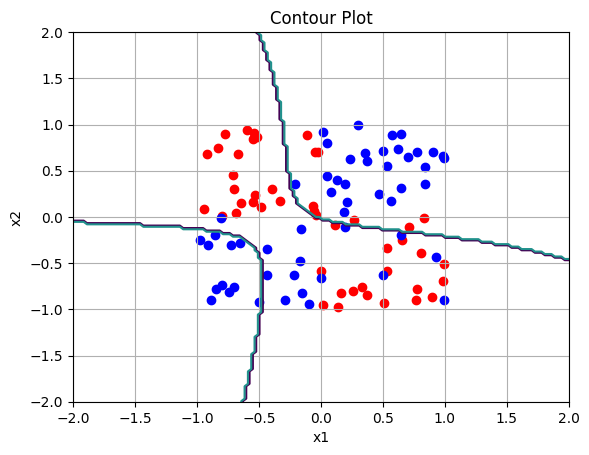

In [144]:
seqx1x2 = np.linspace(start = -4, stop = 4, num = 300)
np_grid = seqx1x2.shape[0]
shape = (np_grid, np_grid)
MZ = np.zeros(shape)
for i in range(np_grid):
    for j in range(np_grid):
        x1 = seqx1x2[i]
        x2 = seqx1x2[j]
        x1x2 = np.column_stack((x1, x2, 1))
        h1 = np.tanh(np.dot(x1x2, Z))
        h1 = np.column_stack((h1, np.ones_like(h1[:, 0])))
        MZ[i, j] = np.sign(np.dot(h1, W))[0]


plt.contour(seqx1x2, seqx1x2, MZ, levels = 1)
plt.scatter(x1_points[:, 0], x1_points[:, 1], color = 'red', label = 'data1')
plt.scatter(x2_points[:, 0], x2_points[:, 1], color = 'blue', label = 'data2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()